In [1]:
import torch

In [2]:
# Copy the git repository
!git clone https://github.com/atulgupta01/ERA_Repo.git

Cloning into 'ERA_Repo'...
remote: Enumerating objects: 113, done.
remote: Total 113 (delta 0), reused 0 (delta 0), pack-reused 113
Receiving objects: 100% (113/113), 43.10 KiB | 2.87 MiB/s, done.
Resolving deltas: 100% (59/59), done.


In [3]:
#import from git modules

from ERA_Repo.model.resnet import ResNet18
from ERA_Repo.Main import get_cifar_data, train_val_seq, get_optimizer, get_scheduler, \
get_epochs
from ERA_Repo.util import lr_range_checker, train_transforms, test_transforms, \
get_model_summary, accuracy_plot, plot_error

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
!pip install torchsummary

In [6]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

model = get_model_summary (ResNet18, device, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [7]:
train_loader, test_loader = get_cifar_data(train_transforms, test_transforms)

100%|██████████| 170498071/170498071 [00:24<00:00, 7005425.97it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


  0%|          | 0/200 [00:00<?, ?it/s]

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 2.79E-02


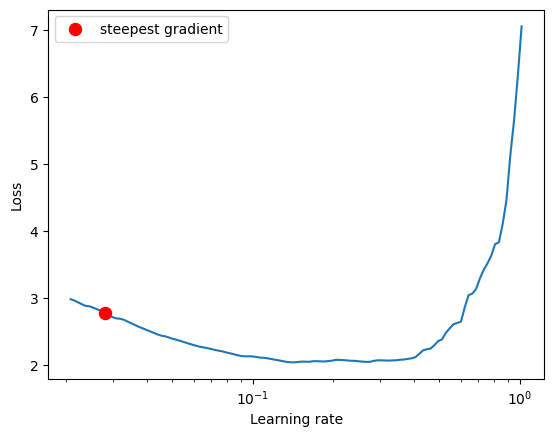

In [8]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = get_optimizer("ADAM", model, 0.015, 1e-4)
lr_range_checker(model, train_loader, optimizer, criterion)

In [10]:
MAX_LR = 2.79E-02
steps_per_epoch = len(train_loader)
anneal_strategy = 'linear'

scheduler = get_scheduler("OneCycle", optimizer, MAX_LR, steps_per_epoch, get_epochs(), anneal_strategy)

train_losses, test_losses, train_acc, test_acc, lrs = train_val_seq(model,
                    device,
                    train_loader,
                    test_loader,
                    optimizer,
                    scheduler,
                    criterion,
                    20)


EPOCH: 0


Loss=1.2538652420043945 Batch_id=97 Accuracy=51.81 LR=0.005814496932515337: 100%|██████████| 98/98 [00:51<00:00,  1.90it/s]



Test set: Average loss: 0.0036, Accuracy: 4630/10000 (46.30%)

EPOCH: 1


Loss=0.9862369298934937 Batch_id=97 Accuracy=62.23 LR=0.011349993865030675: 100%|██████████| 98/98 [00:50<00:00,  1.95it/s]



Test set: Average loss: 0.0025, Accuracy: 5883/10000 (58.83%)

EPOCH: 2


Loss=0.8471592664718628 Batch_id=97 Accuracy=67.99 LR=0.01688549079754601: 100%|██████████| 98/98 [00:49<00:00,  1.97it/s]



Test set: Average loss: 0.0018, Accuracy: 6718/10000 (67.18%)

EPOCH: 3


Loss=0.7527286410331726 Batch_id=97 Accuracy=71.72 LR=0.02242098773006135: 100%|██████████| 98/98 [00:49<00:00,  1.98it/s]



Test set: Average loss: 0.0020, Accuracy: 6614/10000 (66.14%)

EPOCH: 4


Loss=0.8007785081863403 Batch_id=97 Accuracy=72.86 LR=0.02788102230612245: 100%|██████████| 98/98 [00:49<00:00,  1.97it/s]



Test set: Average loss: 0.0031, Accuracy: 5868/10000 (58.68%)

EPOCH: 5


Loss=0.6770132780075073 Batch_id=97 Accuracy=73.82 LR=0.02602120830612245: 100%|██████████| 98/98 [00:49<00:00,  1.98it/s]



Test set: Average loss: 0.0029, Accuracy: 5543/10000 (55.43%)

EPOCH: 6


Loss=0.7634787559509277 Batch_id=97 Accuracy=76.01 LR=0.02416139430612245: 100%|██████████| 98/98 [00:49<00:00,  1.98it/s]



Test set: Average loss: 0.0022, Accuracy: 6243/10000 (62.43%)

EPOCH: 7


Loss=0.6809936165809631 Batch_id=97 Accuracy=77.30 LR=0.022301580306122448: 100%|██████████| 98/98 [00:49<00:00,  1.97it/s]



Test set: Average loss: 0.0021, Accuracy: 6872/10000 (68.72%)

EPOCH: 8


Loss=0.6566223502159119 Batch_id=97 Accuracy=77.95 LR=0.02044176630612245: 100%|██████████| 98/98 [00:49<00:00,  1.98it/s]



Test set: Average loss: 0.0015, Accuracy: 7472/10000 (74.72%)

EPOCH: 9


Loss=0.5062686204910278 Batch_id=97 Accuracy=78.88 LR=0.01858195230612245: 100%|██████████| 98/98 [00:49<00:00,  1.99it/s]



Test set: Average loss: 0.0014, Accuracy: 7715/10000 (77.15%)

EPOCH: 10


Loss=0.524953305721283 Batch_id=97 Accuracy=80.06 LR=0.01672213830612245: 100%|██████████| 98/98 [00:49<00:00,  1.98it/s]



Test set: Average loss: 0.0014, Accuracy: 7610/10000 (76.10%)

EPOCH: 11


Loss=0.5075372457504272 Batch_id=97 Accuracy=80.98 LR=0.01486232430612245: 100%|██████████| 98/98 [00:49<00:00,  1.98it/s]



Test set: Average loss: 0.0013, Accuracy: 7837/10000 (78.37%)

EPOCH: 12


Loss=0.5569474101066589 Batch_id=97 Accuracy=81.79 LR=0.013002510306122449: 100%|██████████| 98/98 [00:49<00:00,  2.00it/s]



Test set: Average loss: 0.0016, Accuracy: 7463/10000 (74.63%)

EPOCH: 13


Loss=0.44794097542762756 Batch_id=97 Accuracy=83.32 LR=0.011142696306122447: 100%|██████████| 98/98 [00:49<00:00,  1.99it/s]



Test set: Average loss: 0.0014, Accuracy: 7588/10000 (75.88%)

EPOCH: 14


Loss=0.44713330268859863 Batch_id=97 Accuracy=84.43 LR=0.00928288230612245: 100%|██████████| 98/98 [00:49<00:00,  1.99it/s]



Test set: Average loss: 0.0012, Accuracy: 8046/10000 (80.46%)

EPOCH: 15


Loss=0.38704586029052734 Batch_id=97 Accuracy=85.39 LR=0.007423068306122448: 100%|██████████| 98/98 [00:49<00:00,  1.98it/s]



Test set: Average loss: 0.0012, Accuracy: 8175/10000 (81.75%)

EPOCH: 16


Loss=0.3933567404747009 Batch_id=97 Accuracy=86.79 LR=0.00556325430612245: 100%|██████████| 98/98 [00:49<00:00,  1.99it/s]



Test set: Average loss: 0.0008, Accuracy: 8716/10000 (87.16%)

EPOCH: 17


Loss=0.2980940341949463 Batch_id=97 Accuracy=88.42 LR=0.003703440306122449: 100%|██████████| 98/98 [00:48<00:00,  2.00it/s]



Test set: Average loss: 0.0007, Accuracy: 8876/10000 (88.76%)

EPOCH: 18


Loss=0.2551805078983307 Batch_id=97 Accuracy=90.55 LR=0.0018436263061224513: 100%|██████████| 98/98 [00:49<00:00,  2.00it/s]



Test set: Average loss: 0.0006, Accuracy: 8977/10000 (89.77%)

EPOCH: 19


Loss=0.20075039565563202 Batch_id=97 Accuracy=92.64 LR=-1.6187693877550008e-05: 100%|██████████| 98/98 [00:49<00:00,  2.00it/s]



Test set: Average loss: 0.0005, Accuracy: 9154/10000 (91.54%)



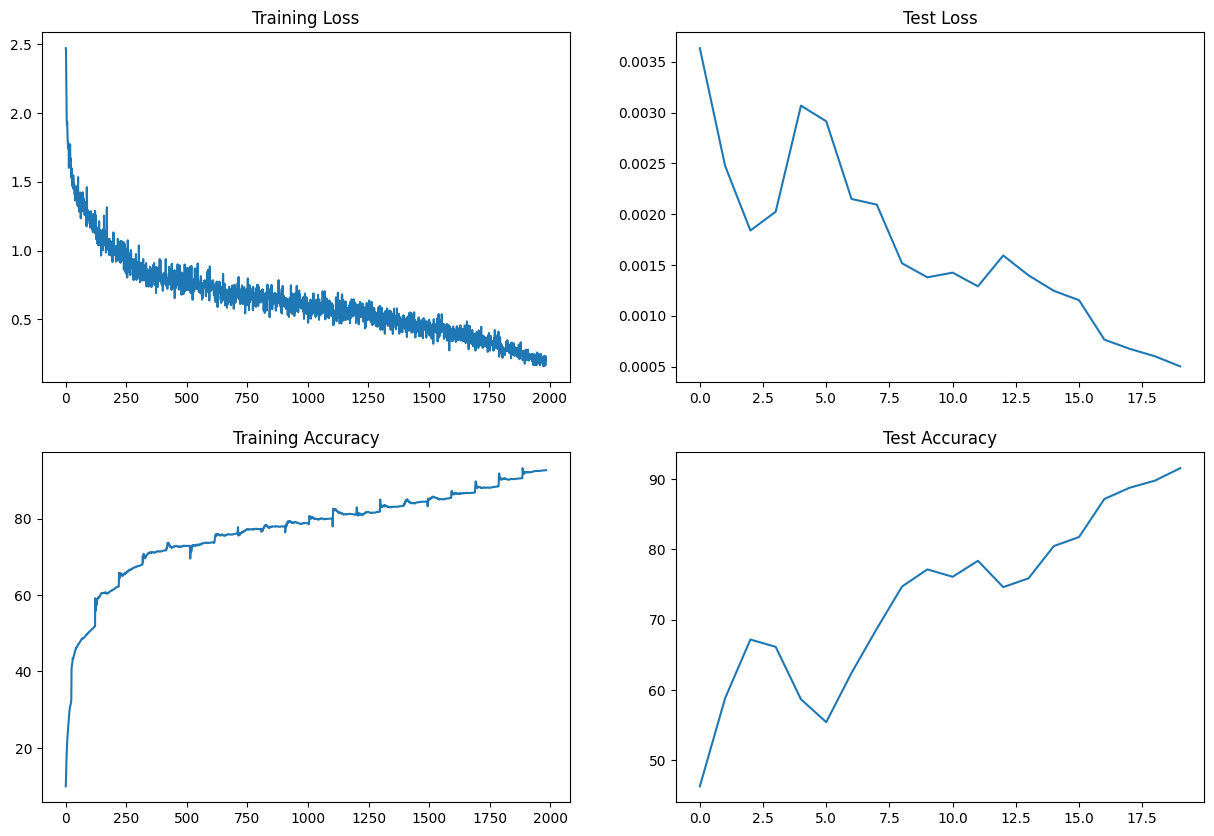

In [11]:
train_loss = torch.tensor(train_losses).cpu().detach().numpy()
accuracy_plot(train_loss,
              test_losses,
              train_acc,
              test_acc)

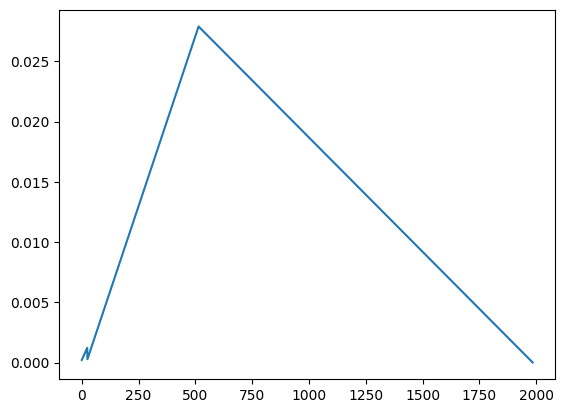

In [12]:
import matplotlib.pyplot as plt
plt.plot(lrs)

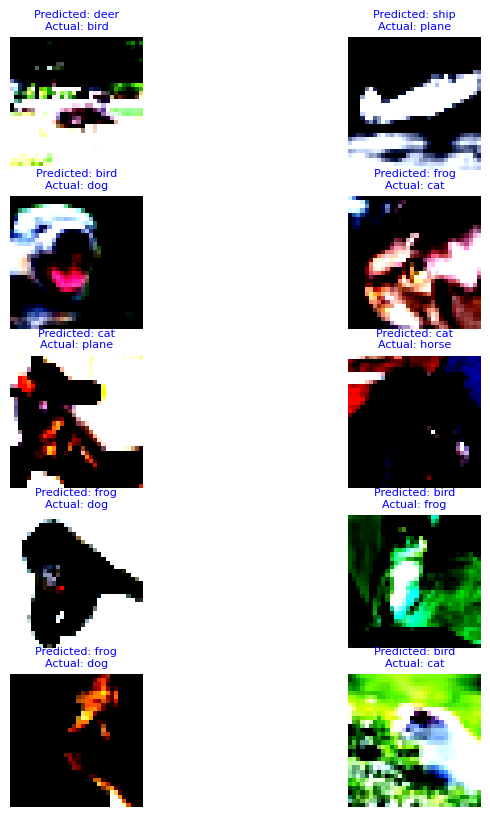

In [13]:
plot_error(model, test_loader, device)

In [25]:
def get_error_images(model, test_loader, device):
  error_images = []
  error_target = []
  error_predicted = []
  count = 0

  plot_size = 10

  for data, target in test_loader:
    data, target = data.to(device), target.to(device)
    output = model(data)
    pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
    for i in range (0, 127):
      if (pred[i].cpu().numpy()[0] != target[i].cpu().numpy()):
        error_images.append(data[i])
        error_target.append(target[i].cpu().numpy())
        error_predicted.append(pred[i].cpu().numpy()[0])

        count = count + 1

        if count > plot_size:
          break
    return error_images, error_target, error_predicted

In [26]:
error_images, error_target, error_predicted = get_error_images(model, test_loader, device)

In [52]:
!pip install grad-cam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 20.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  U

In [1]:
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image

In [ ]:
def get_gradcam_image(model, target_layers, input_tensor, rgb_img, cam_target, cam_batch_size = 64):
    cam = GradCAM(model=model, target_layers=target_layers)
    cam.batch_size = cam_batch_size
    targets = [ClassifierOutputTarget(cam_target)]
    grayscale_cam = cam(input_tensor=input_tensor, targets=targets)

    # In this example grayscale_cam has only one image in the batch:
    grayscale_cam = grayscale_cam[0, :]
    visualization = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)

    # You can also get the model outputs without having to re-inference
    return cam.outputs, visualization

def plot_grad_cam_image(model, target_layers, input_tensors, images, cam_targets, target_labels,
                        pred_labels = None, losses = None, rows = 5, cols = 5,
               img_size=(5,5), font_size = 7):
    ## create grad_cam
    cam_op_list = []
    cam_v_list = []
    for i in range(rows*cols):
        c, v = get_gradcam_image(model,
                  target_layers = target_layers,
                  input_tensor = input_tensors[i].unsqueeze(0),
                  rgb_img = images[i],
                  cam_target = cam_targets[i])
        cam_op_list.append(c)
        cam_v_list.append(v)

    figure = plt.figure(figsize=img_size)
    for index in range(cols * rows):
        plt.subplot(rows, cols, index+1)
        if pred_labels is not None and losses is not None:
            plt.title(f'target: {target_labels[index]}\nprediction: {pred_labels[index]}',
                  fontsize = font_size)
        else:
            plt.title(f'target: {target_labels[index]}', fontsize = font_size)
        plt.axis('off')
        plt.imshow(cam_v_list[index])
    figure.tight_layout()
    plt.show()

In [ ]:
# grad cam images
plot_grad_cam_image(model = model,
                    target_layers = model.layer3,
                    input_tensors = incorrect_df['transform_image'].to_list(),
                    images = incorrect_df['image'].to_list(),
                    cam_targets = incorrect_df['prediction'].to_list(),
                    target_labels= incorrect_df['target_name'].to_list(),
                    pred_labels= incorrect_df['prediction_name'].to_list(),
                    rows = img_rows, cols = img_cols)